PROBLEM STATEMENT:
The owner of an ice cream business would like me to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). I decide that a Linear Regression model might be a good candidate to solve this problem.
Data set:

Independant variable X: Outside Air Temperature
Dependant variable Y: Overall daily revenue generated in dollars

In [1]:
#libraries import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset, create data frame using pandas
IceCream = pd.read_csv('IceCreamData.csv')
IceCream.head(15)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [3]:
IceCream.tail(15)

,Temperature,Revenue
485,23.407257,501.345330
486,12.301615,333.334258
487,32.632858,793.079011
488,16.703852,379.318226
489,26.964217,581.074005
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257


In [4]:
IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Notice in min temp we colect $10 and max temp we collect $1,000

In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


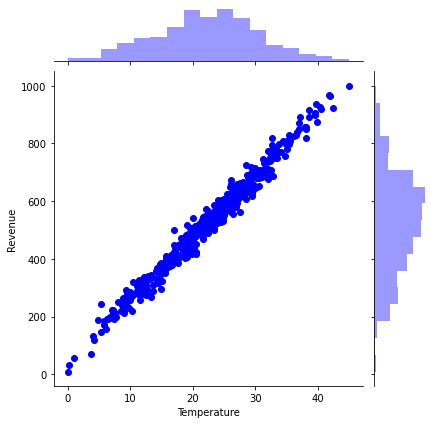

In [7]:
#visualize data
sns.jointplot(x='Temperature', y='Revenue', data= IceCream, color = 'blue')

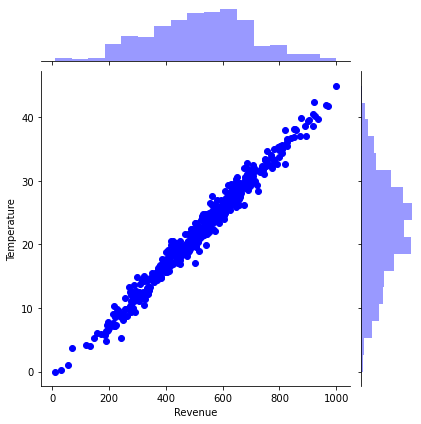

In [8]:
sns.jointplot(x='Revenue', y='Temperature', data= IceCream, color = 'blue')

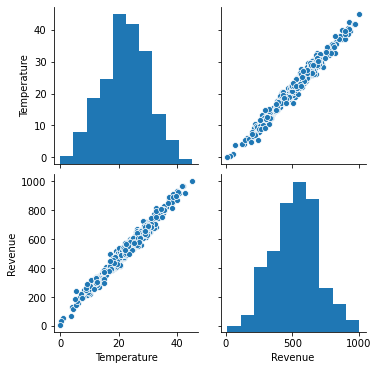

In [9]:
sns.pairplot(IceCream)

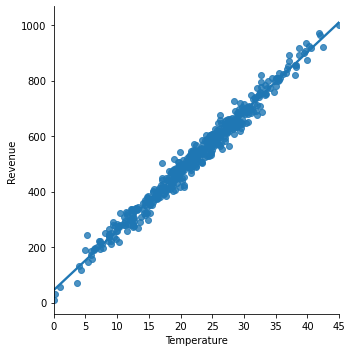

In [10]:
# will a straight line be good for the data? 
sns.lmplot(x= 'Temperature', y= 'Revenue', data= IceCream)

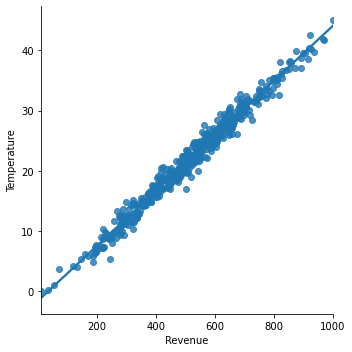

In [11]:
sns.lmplot(x= 'Revenue', y= 'Temperature', data= IceCream)

Create testing and training dataset
temperature is the independant variable or input the model (x)
Revenue is the dependent variable or output to the model (y)

In [12]:
X = IceCream[['Temperature']]
print(X)

     Temperature
0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
..           ...
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736

[500 rows x 1 columns]


In [13]:
y = IceCream['Revenue']
print(y)

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64


In [14]:
#divide data into training and testing
from sklearn.model_selection import train_test_split

In [15]:
# divide data into 20% testing and 80% training 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
X_train

,Temperature
354,39.764129
278,33.744209
116,25.925171
65,6.542514
343,8.033153
...,...
335,24.818754
149,12.442650
497,12.588157
21,15.214569


Good the indexes are shuffled, this prevents overfitting. 

In [18]:
X_test

,Temperature
161,11.077843
101,32.004168
29,35.120151
123,30.562661
433,8.756004
...,...
414,27.117739
309,23.412548
55,27.312811
415,20.016384


In [19]:
X_train.shape

(375, 1)

In [20]:
X_test.shape

(125, 1)

In [21]:
y_train.shape

(375,)

In [22]:
y_test.shape

(125,)

Made sure the dimensions are the same (train 400, test 100)

Train the model

In [23]:
#import the Linear Regression class. True = obtain only the true parameters. Assume there is a y intercept/b value to return.

from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression(fit_intercept = True)

In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.37535133]
Linear Model Coefficient (b) 46.827444250165115


This is basicaly the model the slope is 21 (means it's positive, makes sence because as temperature rises so does revenue).

Test the model
Notes: regresser is the trained model with the known parameters seen above. I'm giving the temperature data and asking the model to predict the revenue data. 

In [27]:
y_predict = regressor.predict(X_test)
y_predict

array([ 283.62023287,  730.92778663,  797.53301948,  700.11506571,
        233.99010662,   46.82744425,  285.74299144,  663.83954929,
        515.00149028,  395.24834214,  646.3291928 ,  546.69312396,
        763.21250722,  719.53592075,  440.98853004,  353.61747085,
        448.93679197,  352.22127693,  539.66210956,  441.91107652,
        522.96124168, 1008.71825392,  454.38252824,  292.71874778,
        410.16329193,  625.4284369 ,  431.51995863,  696.80089936,
        758.9472228 ,  517.29624027,  636.76718482,  541.73099305,
        818.83163436,  496.27409161,  428.83060299,  510.92918296,
        137.38337143,  733.12755695,  891.4350101 ,  710.1117094 ,
        558.96615108,  575.37905706,  547.24283002,  672.08046608,
        643.86982311,  774.90767993,  795.67988147,  662.22597852,
        445.13387821,  559.50756885,  670.66802711,  396.94657683,
        863.04949581,  551.09395717,  530.61528067,  442.45015005,
        361.890518  ,  450.54716007,  681.76479237,  267.55764

ok, these are the $ revenue prediction out of my train model. 

In [28]:
# this is the actual data. 
y_test

161    280.518467
101    711.174065
29     809.672053
123    702.901717
433    246.787161
          ...    
414    658.593732
309    542.839106
55     623.598861
415    477.315188
281    534.364539
Name: Revenue, Length: 125, dtype: float64

Let's visualize by mainly two plots: I'm plotting our training data points and on a new graph plot the testing data points.  

Text(0.5, 1.0, 'Revenue Generated vs. Temperature at Ice Cream Stand (Training set)')

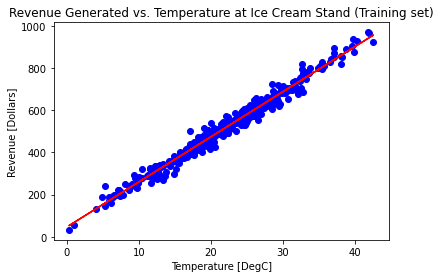

In [29]:
plt.scatter(X_train, y_train, color= 'blue')
#visualize the model
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature at Ice Cream Stand (Training set)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature at Ice Cream Stand (Testing set)')

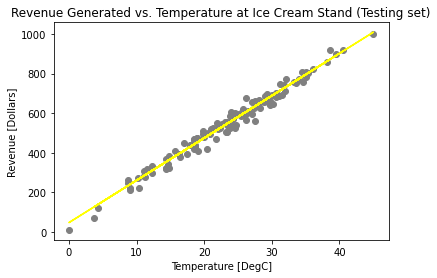

In [30]:
plt.scatter(X_test, y_test, color= 'gray')
#visualize the model
plt.plot(X_test, regressor.predict(X_test), color = 'yellow')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature at Ice Cream Stand (Testing set)')

Looking at the straight line: does m and b make sence? Slope m is positive. 
Create different viz

ValueError: Expected 2D array, got scalar array instead:
array=30.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.